In [2]:
"""
This file runs all the classification models and SHAP
"""


import os
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../../ukb-dementia-shap/")


from logic.data_processing.data_import import dataload
from logic.data_processing.data_processing import data_proc_main
from logic.analysis.analysis import AnalysisCharts
from logic.ml.classification_shap import IDEARs_funcs
from ukb_utils.utils import basic_funcs

import pandas as pd
import numpy as np

ac=dataload()
dp=data_proc_main()
ml=IDEARs_funcs()
an=AnalysisCharts()

drops=['date_of_attending_assessment_centre_f53_0_0','PD','dementia']
wordsremove=ml.wordsremovePD
run='new_holdout_no_norm'
featshow=25
varsselect=50
runs_study=10
runs_main=3

load_data1=False
create_hold=False
load_hold=False
run_main=False
load_main=False
show_SHAP_main=False
show_ROC=False
shap_mf_scat=False
study_comp=False
study_comp_load=False
study_comp_shap=False
ROC_comb=False
shap_mf_scat_comb=False
rocauc_boxplots=False
final_acc=False




Creating holdout.....
Total AD in data: 2092
running main classifier on all vars......
Total AD in data: 1674
Total AD in data: 1674
Total AD in data: 1674


<Figure size 2000x3000 with 0 Axes>

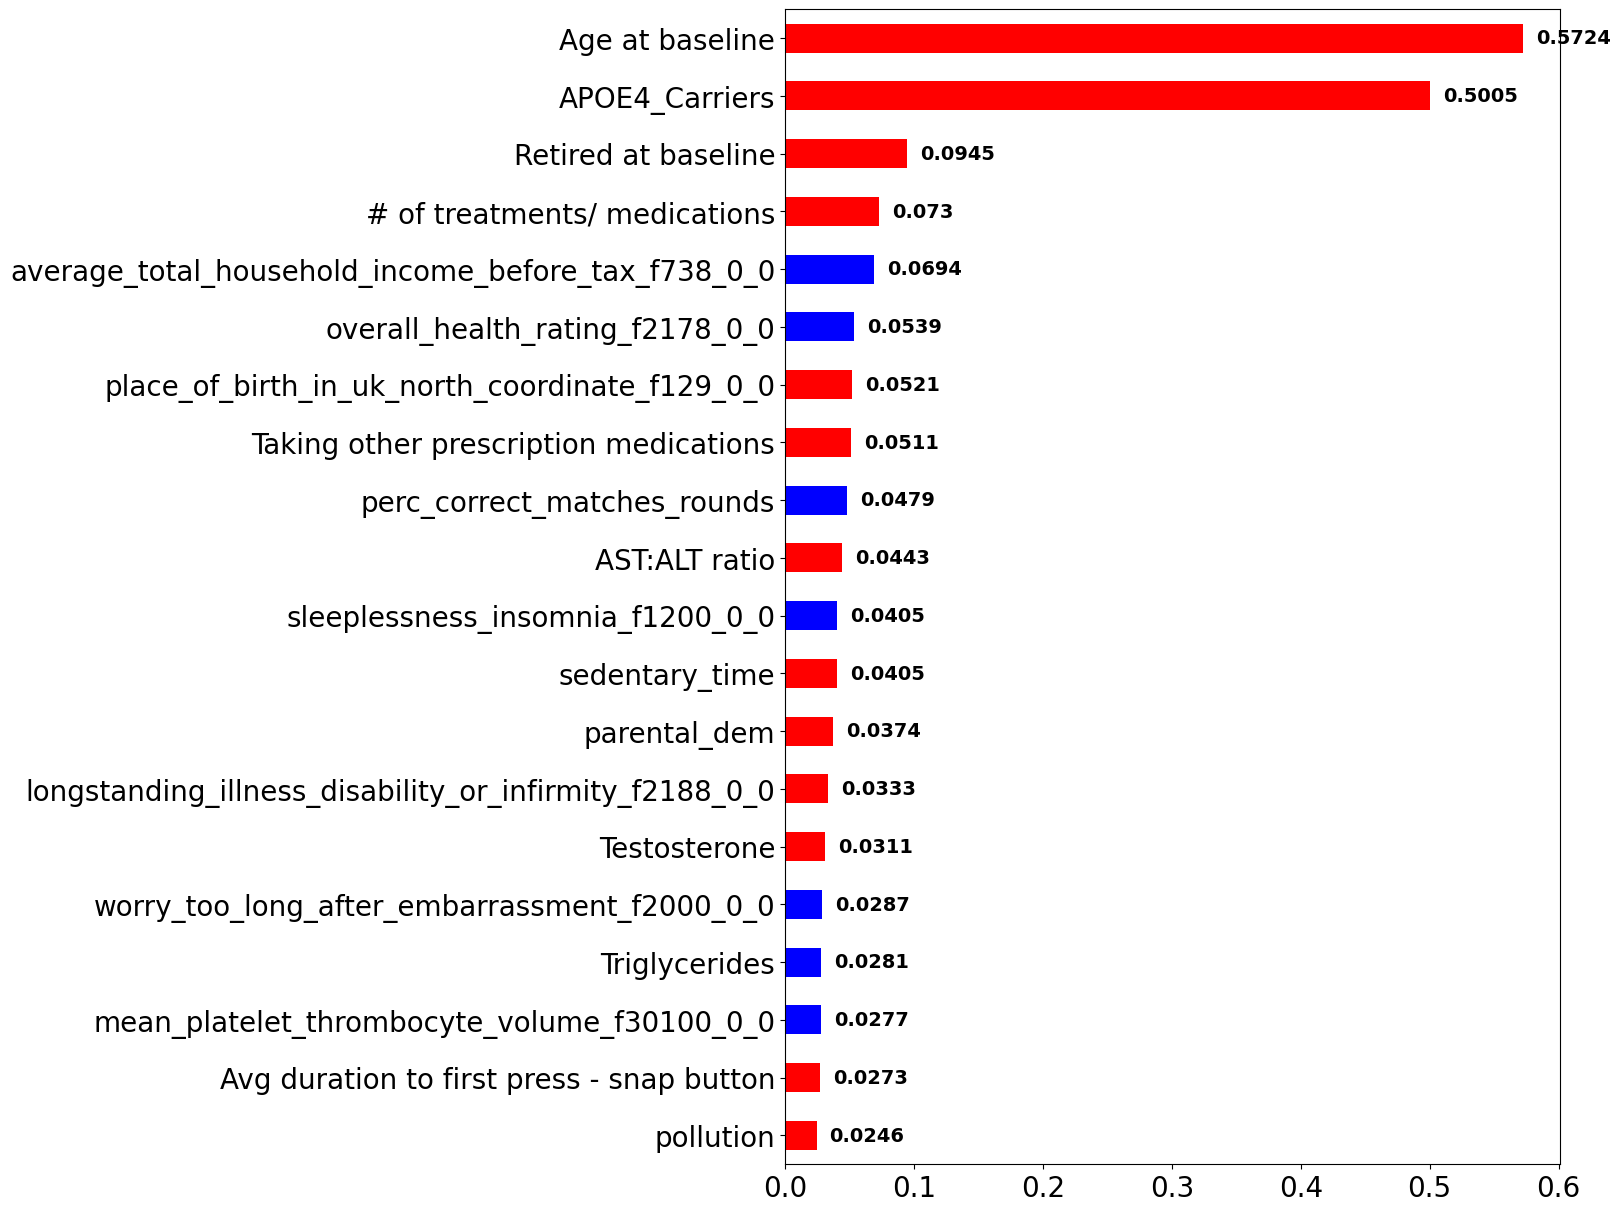

Total AD in data: 1050
Total AD in data: 1050
Total AD in data: 1050


<Figure size 2000x3000 with 0 Axes>

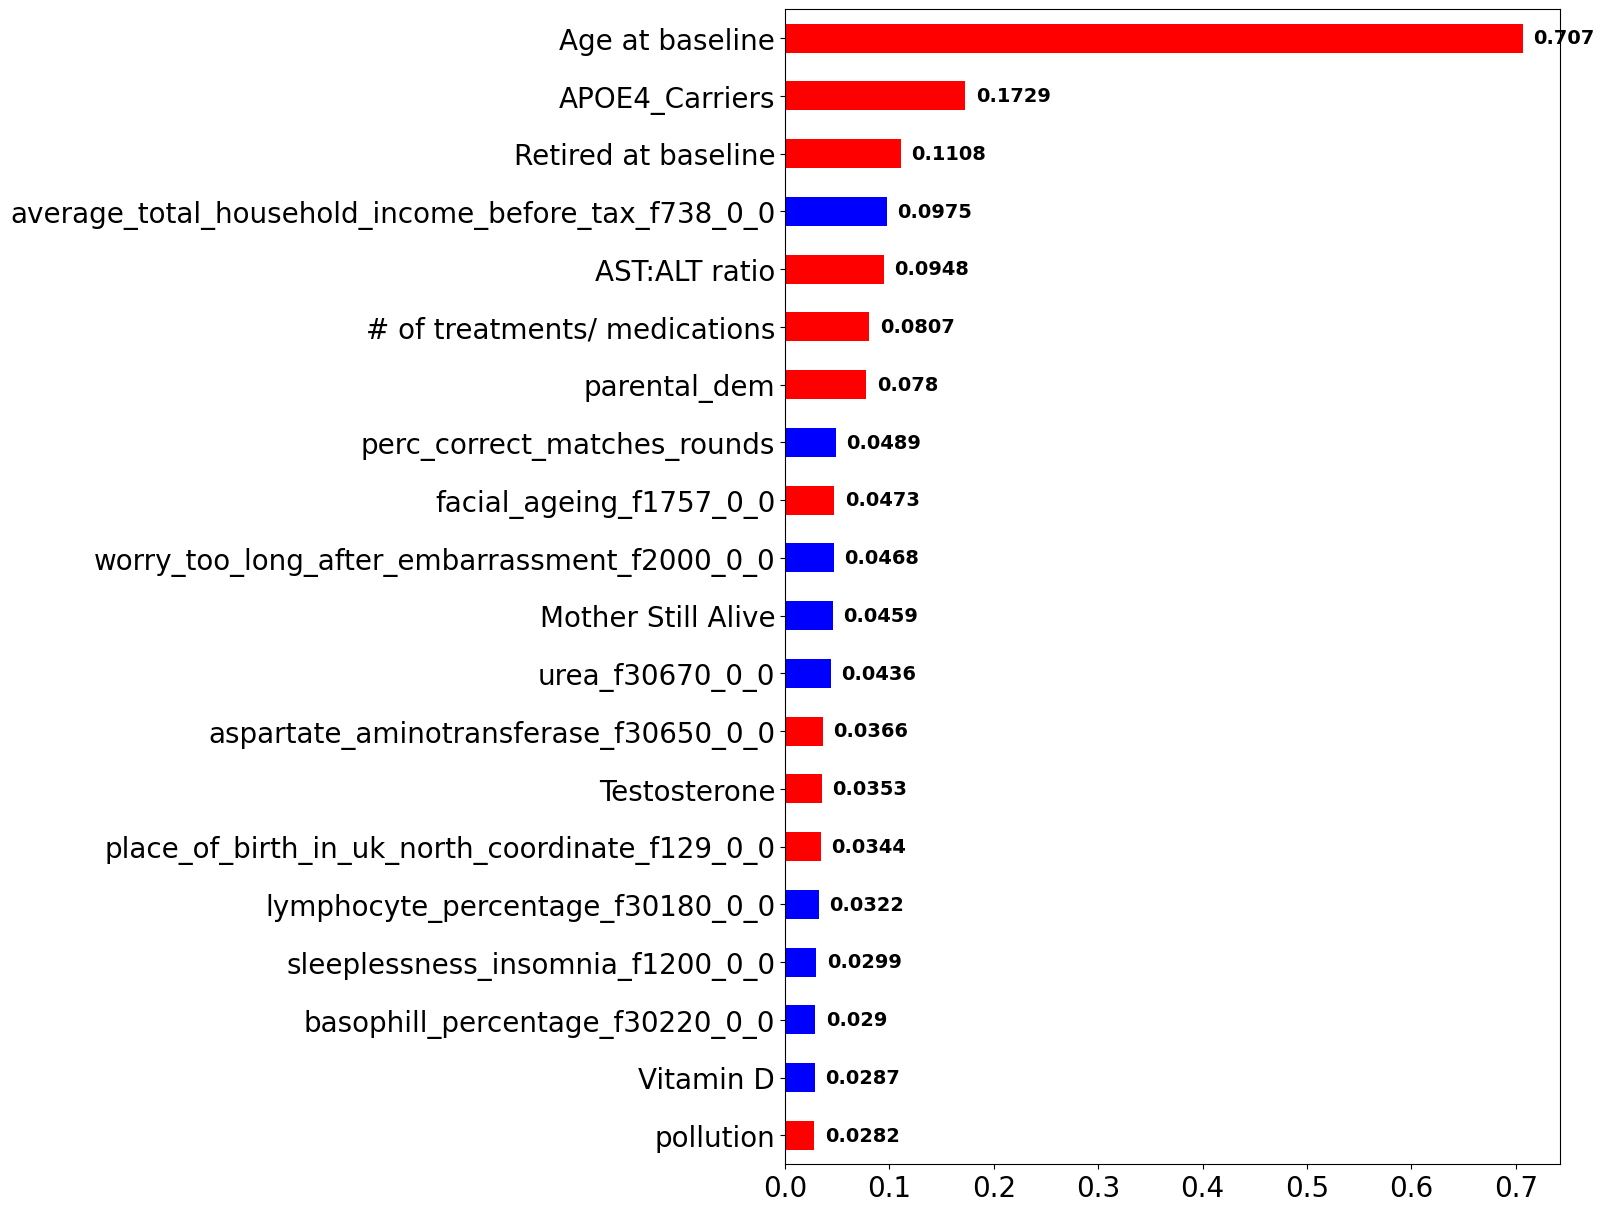

Total AD in data: 624
Total AD in data: 624
Total AD in data: 624


<Figure size 2000x3000 with 0 Axes>

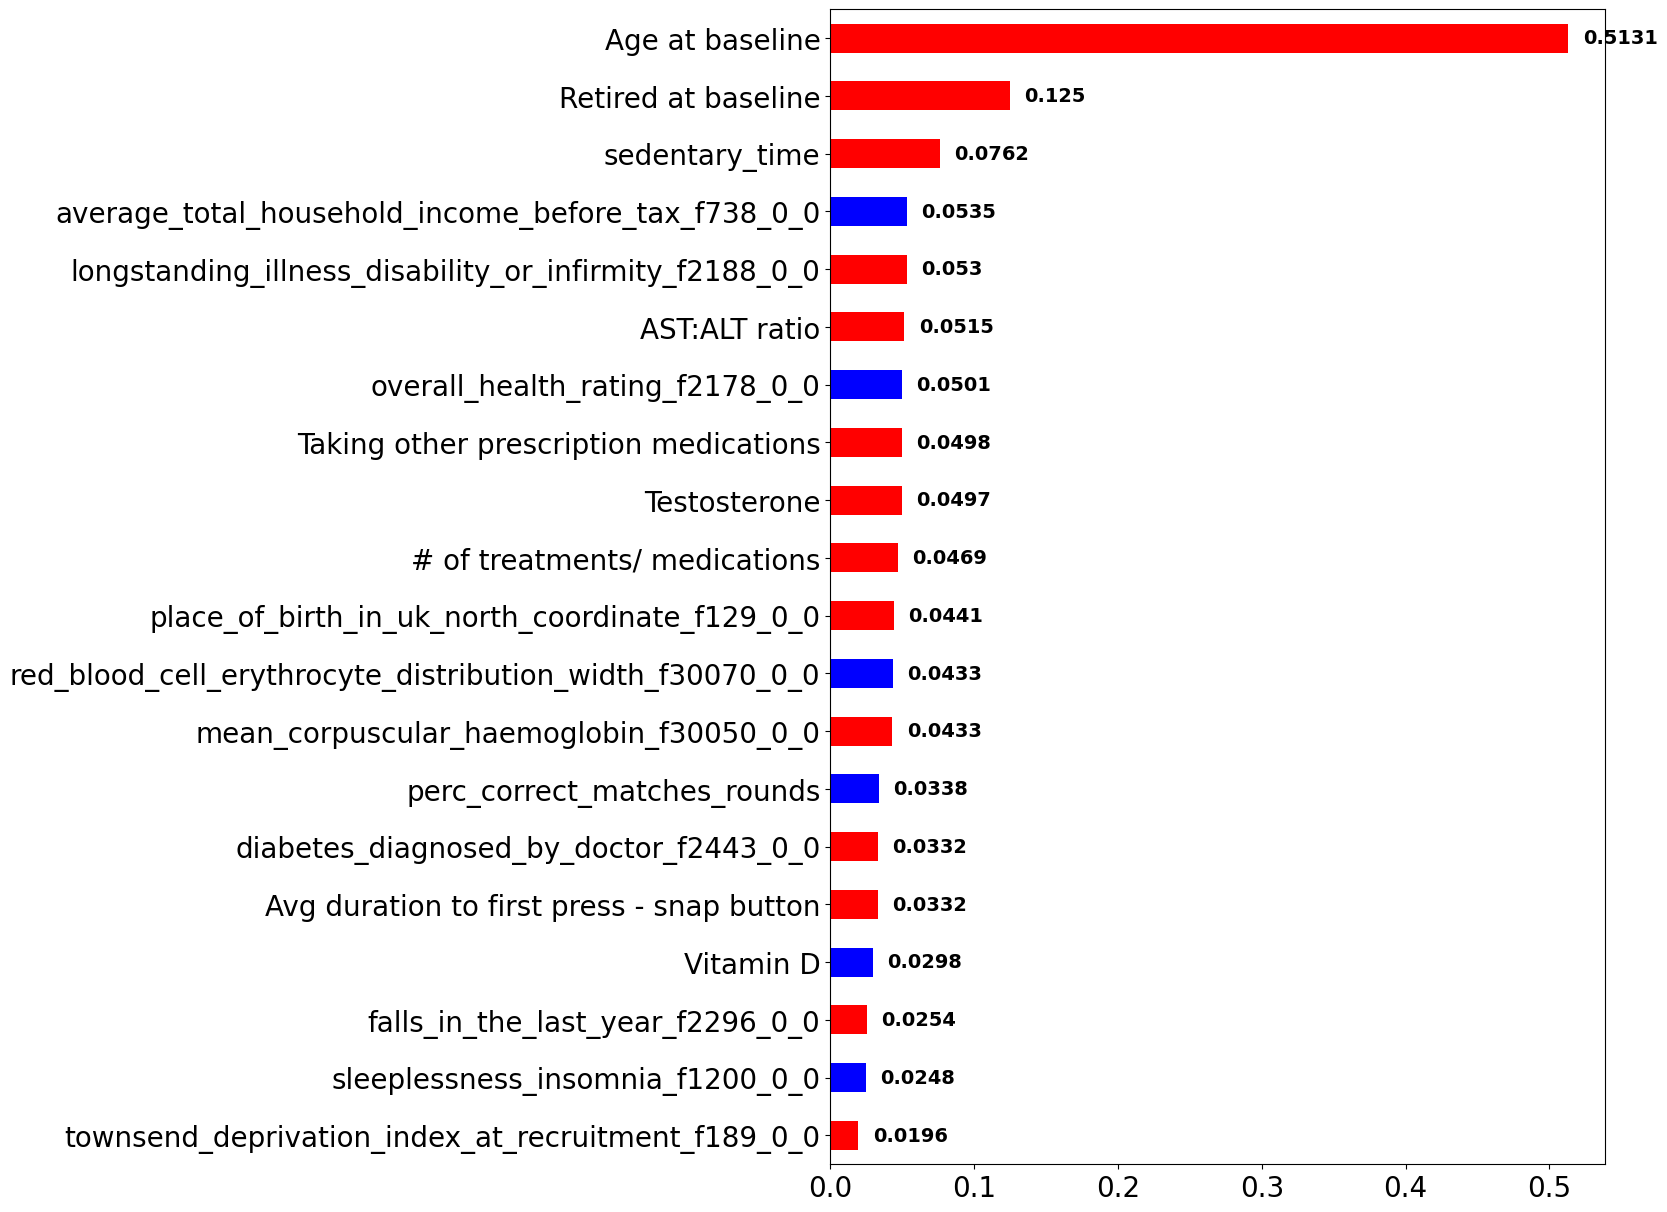

SHAP from main classifier: ALL


<Figure size 2000x3000 with 0 Axes>

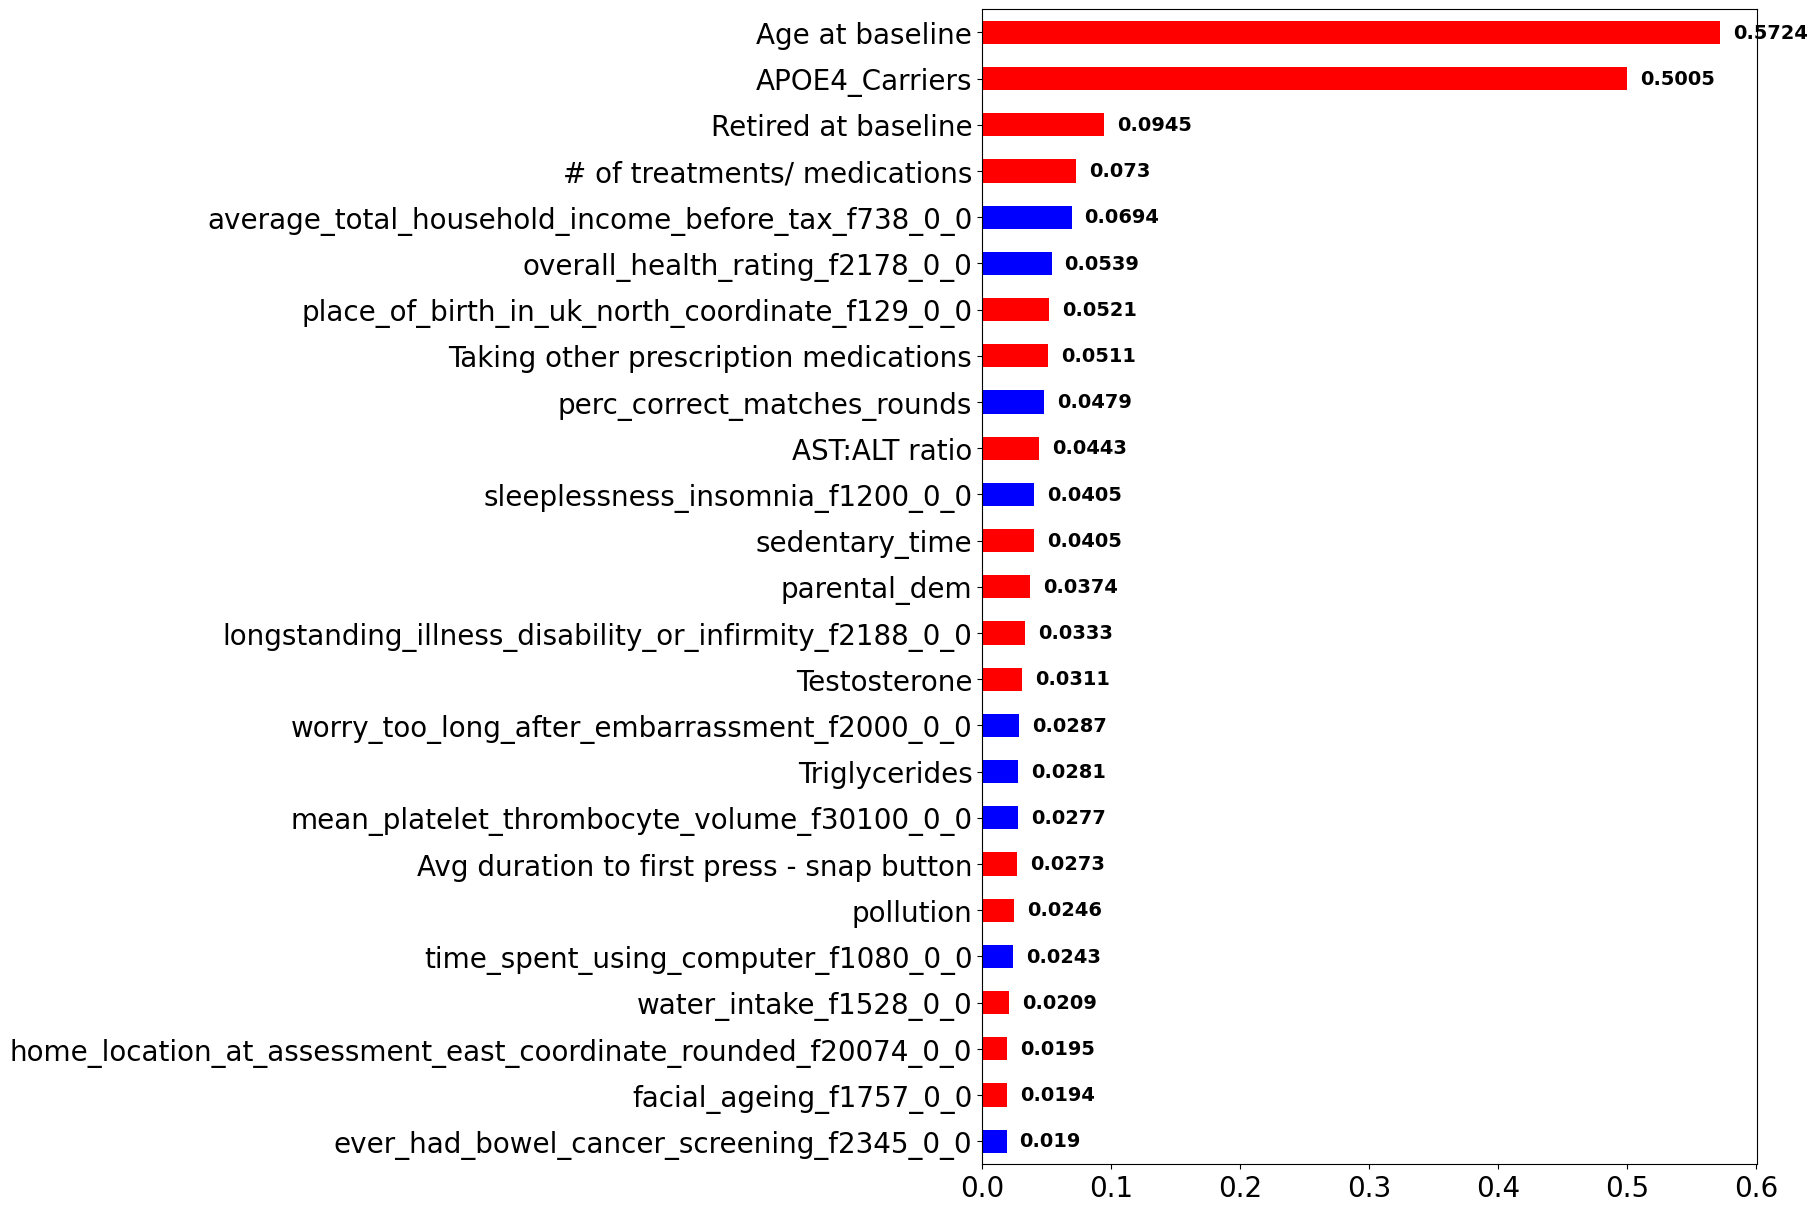

SHAP from main classifier: APOE4+ve


<Figure size 2000x3000 with 0 Axes>

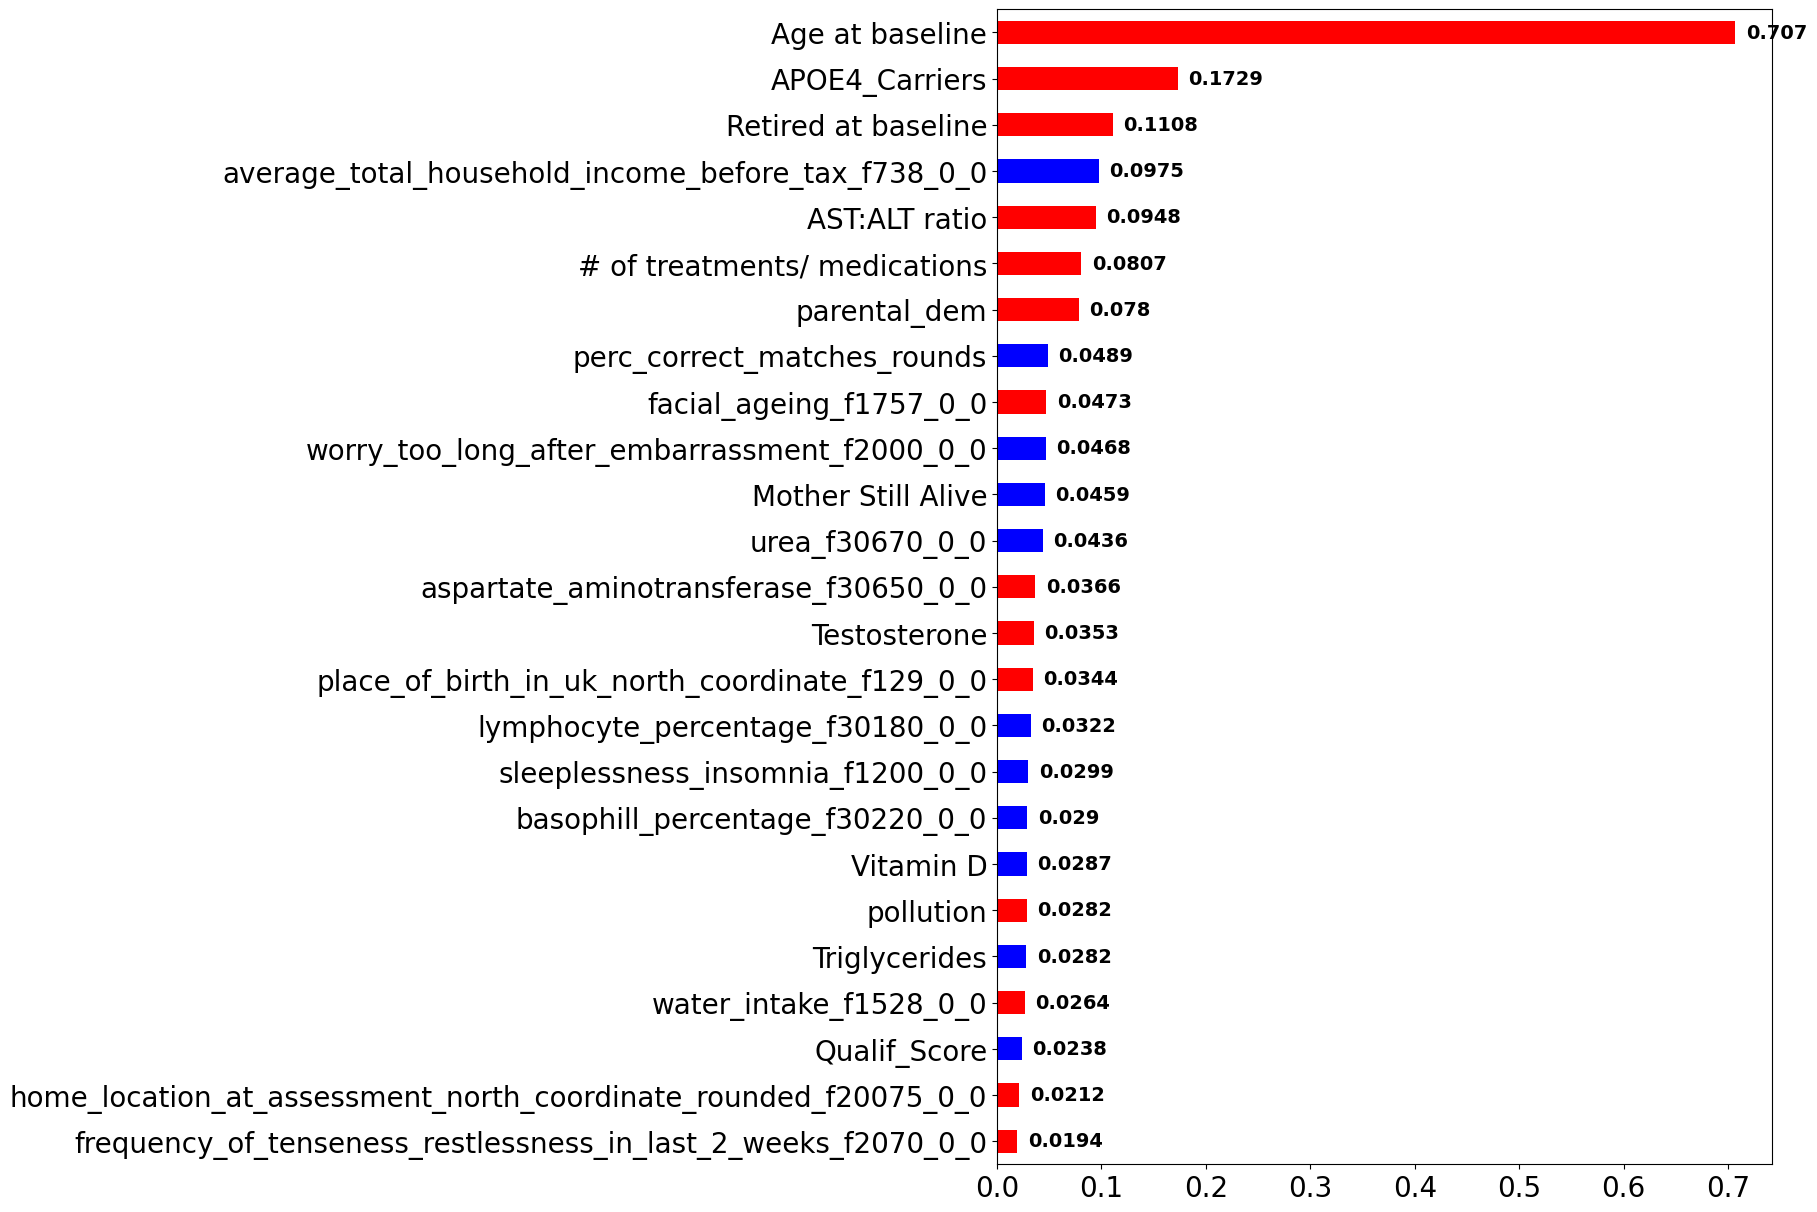

SHAP from main classifier: APOE4-ve


<Figure size 2000x3000 with 0 Axes>

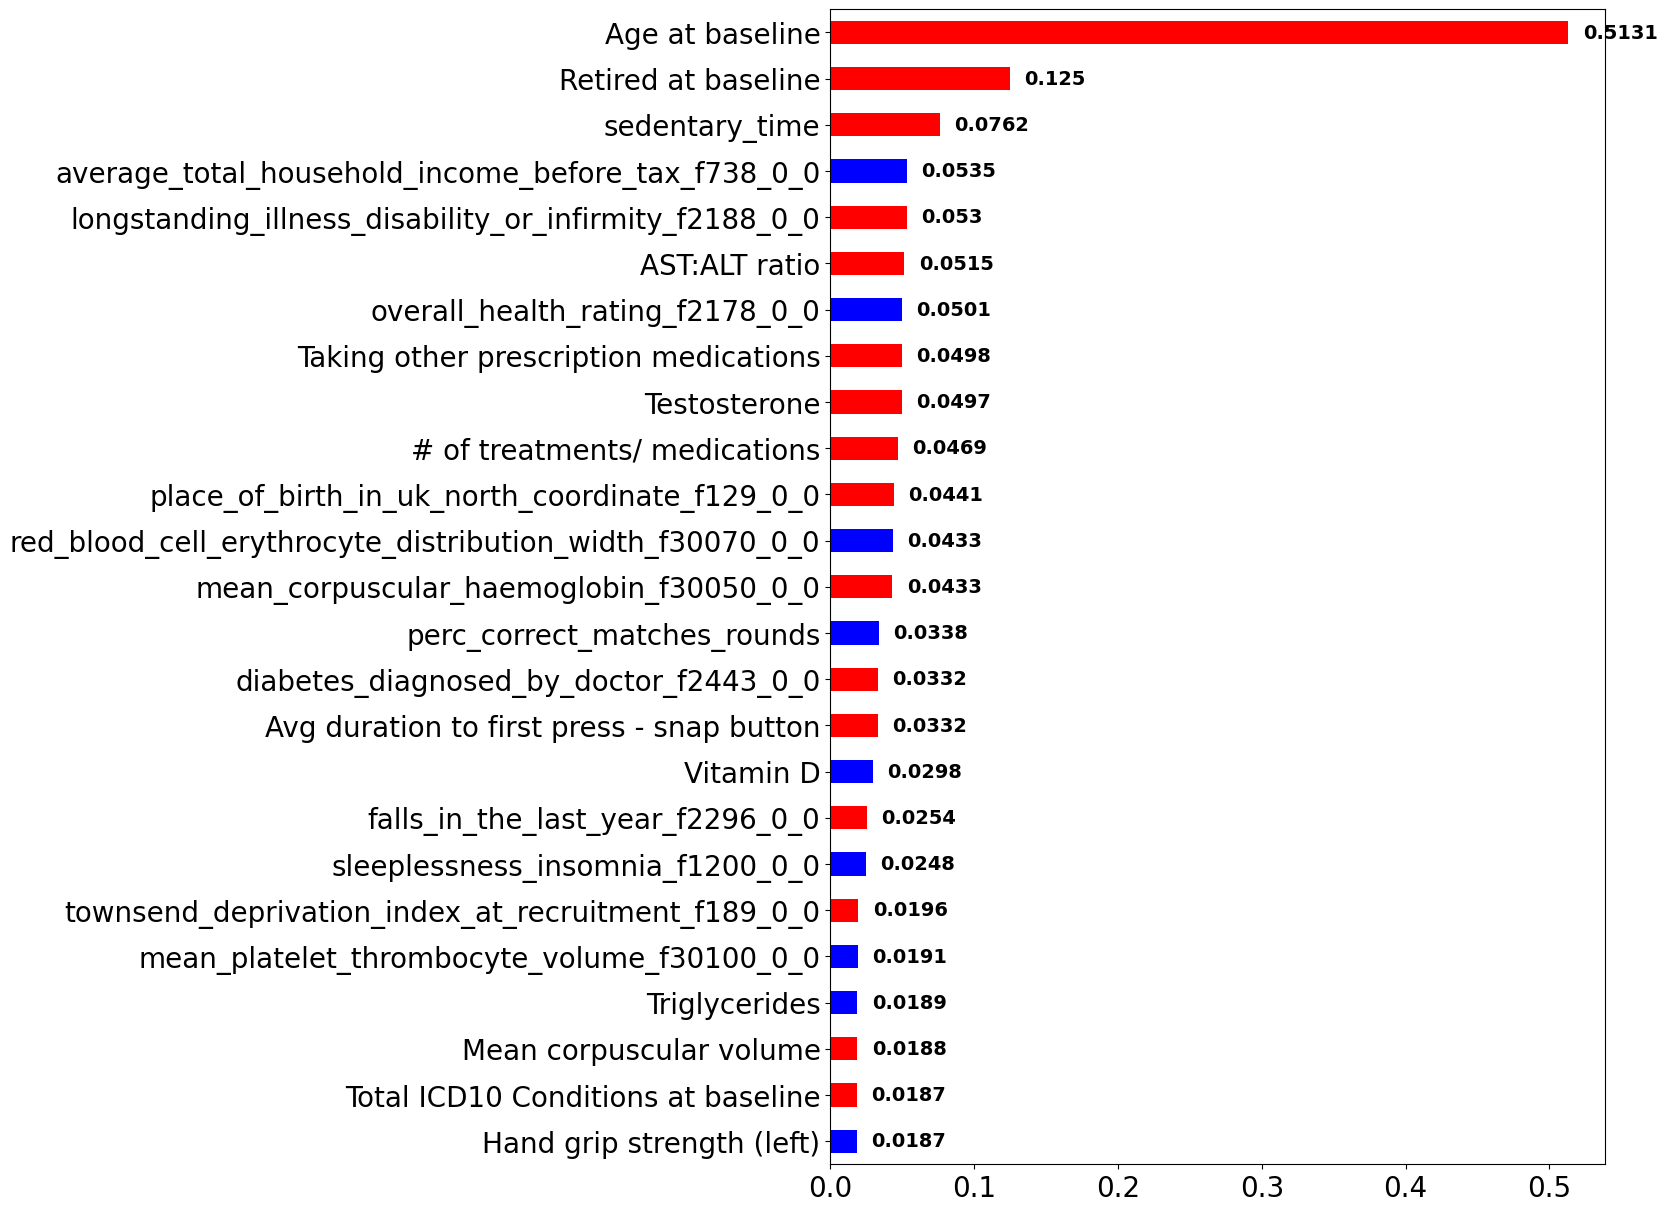

In [3]:
for i in range(0,1):

    run='run2711'+str(i)
    create_hold=True
    load_hold=False
    run_main=True
    show_SHAP_main=True
    study_comp=True
    study_comp_load=False
    study_comp_shap=True
    shap_mf_scat_comb=False

    if load_data1:
        df_ad_full=pd.read_parquet(dp.path+'df_AD_final.parquet')

    if create_hold:
        print("Creating holdout.....")
        df_ad_full=pd.read_parquet(dp.path+'df_AD_final.parquet')
        df_ad,df_ad_val=ml.holdout_data(df_ad_full,agemin=55,agemax=70,depvar='AD',apoe=2,holdout_ratio=0.2)
        df_ad.to_parquet(ml.path+'df_ad'+run+'parquet')
        df_ad_val.to_parquet(ml.path+'df_ad_val'+run+'parquet')

    if load_hold:
        print("loading holdout......")
        df_ad=pd.read_parquet(ml.path+'df_ad'+run+'parquet')
        df_ad_val=pd.read_parquet(ml.path+'df_ad_val'+run+'parquet')

    if run_main:
        print("running main classifier on all vars......")
        #normvars=['standing_height_f50_0_0','testosterone_f30850_0_0']
        #df_pd=an.age_gend_norm_mult(df=df_pd,vars=normvars)
        mask=(df_ad[ 'APOE4_Carriers']>0)

        shap_tuple_all=ml.run_entire_data_pd(df=df_ad,runs=runs_main,outfile='shap_all_ad'+run,
                                                  drops=drops,wordsremove=ml.wordsremoveAD,savefile=False,
                                            save_featslist=True,depvar='AD',agemin=55,agemax=70)                                          

        
        shap_tuple_apoe4pos=ml.run_entire_data_pd(df=df_ad[mask],runs=runs_main,outfile='shap_APOE4pos_ad'+run,
                                                  drops=drops,wordsremove=ml.wordsremoveAD,savefile=False,
                                            save_featslist=True,depvar='AD',agemin=55,agemax=70)                                          

        shap_tuple_apoe4neg=ml.run_entire_data_pd(df=df_ad[~mask],runs=runs_main,outfile='shap_APOE4neg_ad'+run,
                                                  drops=drops,wordsremove=ml.wordsremoveAD,savefile=False,
                                            save_featslist=True,depvar='AD',agemin=55,agemax=70) 
        
        
        df_shap_all=pd.read_parquet(ml.path+'shap_all_ad'+run+'.parquet')
        df_shap_apoe4pos=pd.read_parquet(ml.path+'shap_APOE4pos_ad'+run+'.parquet')
        df_shap_apoe4neg=pd.read_parquet(ml.path+'shap_APOE4neg_ad'+run+'.parquet')
      
        
        

    if load_main:
        print("loading main classifier on all vars......")
        shap_tuple_all=pd.read_pickle(ml.path+'shap_tuple_all_ad'+run+'.pkl')
        shap_tuple_apoe4pos=pd.read_pickle(ml.path+'shap_APOE4pos_ad'+run+'.pkl')
        shap_tuple_apoe4neg=pd.read_pickle(ml.path+'shap_APOE4neg_ad'+run+'.pkl')

    if show_SHAP_main:
        print("SHAP from main classifier: ALL")
        feats_all=ml.shapgraphs_tuple(shap_tuple_all,max_disp=featshow,figname='SHAP IDEARS ENTIRE COHORT '+run)
        feats_all.to_parquet('feats_all_ad'+run+'parquet')
        print("SHAP from main classifier: APOE4+ve")
        feats_apoe4pos=ml.shapgraphs_tuple(shap_tuple_apoe4pos,max_disp=featshow,figname='SHAP IDEARS APOE4+ve '+run)
        feats_apoe4pos.to_parquet('feats_apoe4pos'+run+'parquet')
        print("SHAP from main classifier: APOE4-ve")
        feats_apoe4neg=ml.shapgraphs_tuple(shap_tuple_apoe4neg,max_disp=featshow,figname='SHAP IDEARS APOE4-ve '+run)
        feats_apoe4neg.to_parquet('feats_apoe4neg'+run+'parquet')
  

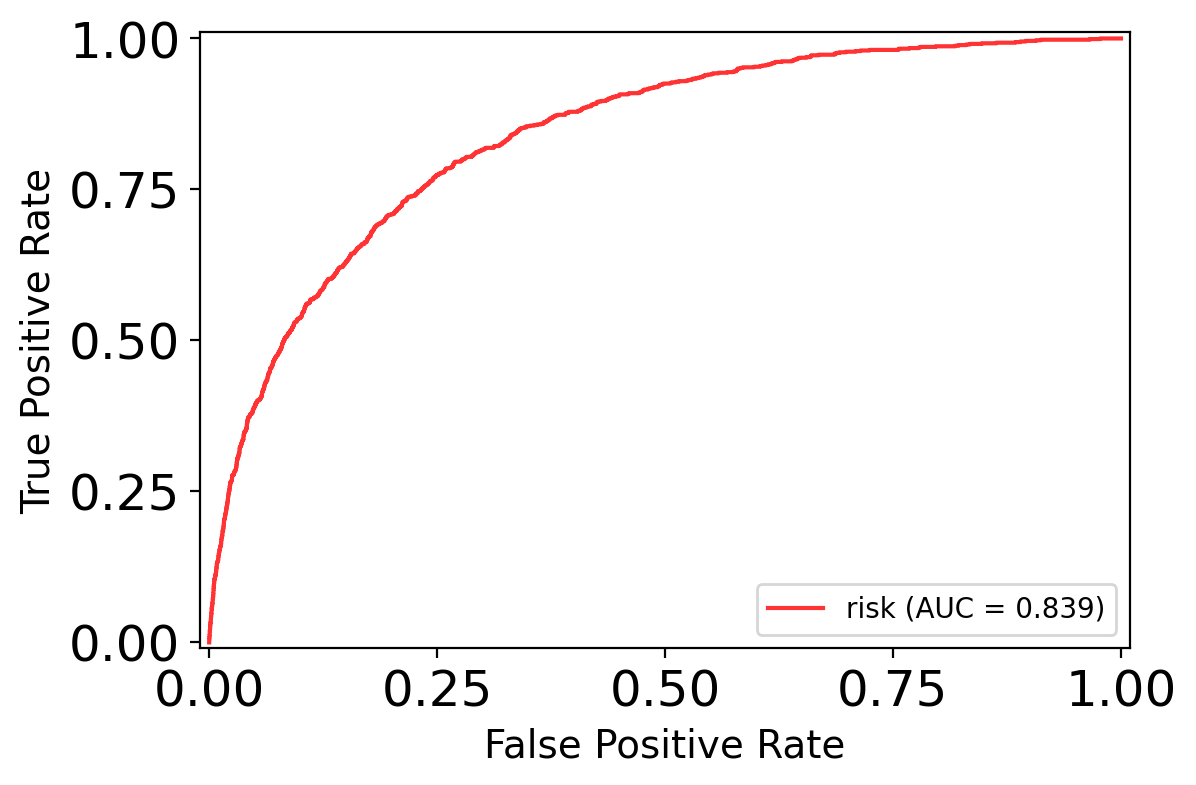

[0.838884780079701]

In [4]:
ml.ROCAUC_tuples([shap_tuple_all[2]],labels=['risk'],cols=['red'],figname='ROCAUC for..',format_out='.svg')

In [16]:
shap_tuple_all[2][0]

,eid,worrier_anxious_feelings_f1980_0_0,fracturedbroken_bones_in_last_5_years_f2463_0_0,fedup_feelings_f1960_0_0,snoring_f1210_0_0,breastfed_as_a_baby_f1677_0_0,ever_had_bowel_cancer_screening_f2345_0_0,diabetes_diagnosed_by_doctor_f2443_0_0,adopted_as_a_child_f1767_0_0,chest_pain_or_discomfort_f2335_0_0,...,pollution,low_activity,sedentary_time,hypertension,alcohol,depressed,Retired,risk,y_pred,y_test
149170,2491852,2.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,15.251111,0,-6.0,1.0,0.000000,0.0,1,0.240090,0.0,1.0
428300,5283691,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,...,19.885556,0,-8.0,0.0,2.000000,0.0,0,0.147403,0.0,1.0
479461,5795366,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,...,21.025556,0,6.0,0.0,2.480911,0.0,1,0.068061,0.0,1.0
208410,3084367,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,13.085556,0,9.0,0.0,4.000000,0.0,1,0.210641,0.0,1.0
247783,3478214,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,17.280000,0,2.0,0.0,0.000000,0.0,1,0.065539,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166245,2662654,2.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,...,18.132222,0,5.0,0.0,1.000000,0.0,0,0.013182,0.0,0.0
360048,4601071,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,...,20.491111,0,6.0,1.0,4.000000,0.0,1,0.015482,0.0,0.0
114067,2140755,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,...,25.627778,0,-7.0,0.0,3.000000,0.0,1,0.157822,0.0,0.0
425869,5259381,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,13.163333,0,7.0,0.0,4.000000,0.0,1,0.036880,0.0,0.0


In [1]:
df_shap_all

NameError: name 'df_shap_all' is not defined

In [1]:
df_ad_full=pd.read_parquet(dp.path+'df_AD_final.parquet')

NameError: name 'pd' is not defined

In [ ]:

      

    if show_ROC:
        print('ROCS ALL, Male, Female on full classifier')
        ml.ROCAUC_tuples(df_out_list=[shap_tuple[2],shap_tuple_female[2],shap_tuple_male[2]],
                    labels=['IDEARS - all','IDEARS - female','IDEARS - male'],cols=['black','red','blue'],figname='ROCAUC for total..'+run)

    if shap_mf_scat:
        print('Male female SHAP on main classifier....')
        feats_male.rename(columns={'SHAP_abs':'SHAP_abs_male','Sign':'Sign_male','Corr':'Corr_male'},inplace=True)
        feats_female.rename(columns={'SHAP_abs':'SHAP_abs_female','Sign':'Sign_female','Corr':'Corr_female'},inplace=True)
        df_shap=pd.merge(feats_male.head(featshow),feats_female.head(featshow),on='Variable',how='outer')
        df_shap.to_csv('/Users/michaelallwright/Downloads/SHAP_All_mf_AD'+run+'.csv')

    if study_comp:
        print('Combination and study classifier runs...')

        normvars=['standing_height_f50_0_0','testosterone_f30850_0_0']
        df_ad=an.age_gend_norm_mult(df=df_ad,vars=normvars)

        studycols=list(df_ad[dp.studycols_dem].columns)
        genos=[col for col in df_ad.columns if 'Geno' in col]
        
        combcolsa=list(set(list(df_shap_female.sort_values(by='SHAP_abs',ascending=False)['Variable'].head(25))+\
    list(df_shap_male.sort_values(by='SHAP_abs',ascending=False)['Variable'].head(25))+\
    list(df_shap_all.sort_values(by='SHAP_abs',ascending=False)['Variable'].head(25))))

        #combcols=list(set(list(feats_male['Variable'].tail(varsselect))+list(feats_female['Variable'].tail(varsselect))+
        #list(feats_all.tail(varsselect)['Variable'])+studycols+genos+['neutrophill_lymphocyte_ratio']))

        combcols=list(set(combcolsa+studycols+genos+['neutrophill_lymphocyte_ratio']))
        combcols=[ml.invmap(c) for c in combcols]
        combcols=[c for c in combcols if c in df_pd.columns and 'sample_dilution' not in c]
        combcols=list(set(combcols))



        mask=(df_pd[ 'sex_f31_0_0']==0)
        shap_tuple_all_comb=ml.run_entire_data_pd(df=df_ad[combcols],runs=runs_study,outfile='shap_tuple_all_ad_comb'+run+'.pkl',
                                                 drops=drops,wordsremove=ml.wordsremoveAD,holdout_ratio=0.4,
                                                 depvar='AD',agemin=55,agemax=70)
        shap_tuple_male_comb=ml.run_entire_data_pd(df=df_ad[combcols][mask],runs=runs_study,outfile='shap_tuple_male_ad_comb'+run+'.pkl',
                                                  drops=drops,wordsremove=ml.wordsremoveAD,holdout_ratio=0.4,
                                                  depvar='AD',agemin=55,agemax=70)
        shap_tuple_female_comb=ml.run_entire_data_pd(df=df_ad[combcols][~mask],runs=runs_study,outfile='shap_tuple_female_ad_comb'+run+'.pkl',
                                                    drops=drops,wordsremove=ml.wordsremoveAD,holdout_ratio=0.4,
                                                    depvar='AD',agemin=55,agemax=70)
        shap_tuple_study=ml.run_entire_data_pd(df=df_ad[studycols+genos],
                                                  runs=runs_study,outfile='shap_tuple_study_ad'+run+'.pkl',
                                               drops=genos,wordsremove=ml.wordsremoveAD,
                                              depvar='AD',agemin=55,agemax=70) 
        shap_tuple_study_male=ml.run_entire_data_pd(df=df_ad[studycols+genos][mask],
                                                  runs=runs_study,outfile='shap_tuple_study_male_ad'+run+'.pkl',
                                                    drops=genos,wordsremove=ml.wordsremoveAD,
                                                   depvar='AD',agemin=55,agemax=70)
        shap_tuple_study_female=ml.run_entire_data_pd(df=df_ad[studycols+genos][~mask],
                                                  runs=runs_study,outfile='shap_tuple_study_female_ad'+run+'.pkl',
                                                      drops=genos,wordsremove=ml.wordsremoveAD,
                                                     depvar='AD',agemin=55,agemax=70)



    if study_comp_load:
        print('loading Combination and study classifier.......')
        shap_tuple_all_comb=pd.read_pickle(ml.path+'shap_tuple_all_ad_comb'+run+'.pkl')
        shap_tuple_male_comb=pd.read_pickle(ml.path+'shap_tuple_male_ad_comb'+run+'.pkl')
        shap_tuple_female_comb=pd.read_pickle(ml.path+'shap_tuple_female_ad_comb'+run+'.pkl')
        shap_tuple_study=pd.read_pickle(ml.path+'shap_tuple_study_ad'+run+'.pkl')
        shap_tuple_study_male=pd.read_pickle(ml.path+'shap_tuple_study_male_ad'+run+'.pkl')
        shap_tuple_study_female=pd.read_pickle(ml.path+'shap_tuple_study_female_ad'+run+'.pkl')

    if ROC_comb:
        print('ROC AUC Combination and study classifier.......')
        ml.ROCAUC_tuples(df_out_list=[shap_tuple_all_comb[2],shap_tuple_study[2]],
                    labels=['ALL: IDEARS','ALL: KNOWN ASSOCIATIONS'],cols=['red','blue'],
                         figname='ROCAUC for combined feats ENTIRE COHORT AD'+run,format_out='.jpg')
        ml.ROCAUC_tuples(df_out_list=[shap_tuple_male_comb[2],shap_tuple_study_male[2]],
                    labels=['MALE: IDEARS','MALE: KNOWN ASSOCIATIONS'],cols=['red','blue'],
                         figname='ROCAUC for combined feats MALES AD'+run,format_out='.jpg')
        ml.ROCAUC_tuples(df_out_list=[shap_tuple_female_comb[2],shap_tuple_study_female[2]],
                    labels=['FEMALE: IDEARS','FEMALE: KNOWN ASSOCIATIONS'],cols=['red','blue'],
                         figname='ROCAUC for combined feats FEMALES AD'+run,format_out='.jpg')

    if study_comp_shap:

        print("SHAP from combination classifier: ALL")
        feats_all_comb=ml.shapgraphs_tuple(shap_tuple_all_comb,max_disp=featshow,figname='SHAP IDEARS combined feats ENTIRE COHORT'+run)
        print("SHAP from combination classifier: MALE")
        feats_male_comb=ml.shapgraphs_tuple(shap_tuple_male_comb,max_disp=25,figname='SHAP IDEARS combined feats MALES'+run)
        print("SHAP from combination classifier: FEMALE")
        feats_female_comb=ml.shapgraphs_tuple(shap_tuple_female_comb,max_disp=25,figname='SHAP IDEARS combined feats FEMALES'+run)

    if shap_mf_scat_comb:
        print('Male female SHAP on combination classifier....')
        feats_male_comb.rename(columns={'SHAP_abs':'SHAP_abs_male','Sign':'Sign_male','Corr':'Corr_male'},inplace=True)
        feats_female_comb.rename(columns={'SHAP_abs':'SHAP_abs_female','Sign':'Sign_female','Corr':'Corr_female'},inplace=True)
        df_shap=pd.merge(feats_male_comb,feats_female_comb,on='Variable',how='outer')
        variablemap_inv=dict({ml.variablemap[x]:x for x in ml.variablemap})

        vars_use=list(set(list(feats_male_comb['Variable'].tail(25))+list(feats_female_comb['Variable'].tail(25))+list(feats_all_comb['Variable'].tail(25))))
        df_shap=df_shap[(df_shap['Variable'].isin(vars_use))]
        #df_shap=df_shap[(df_shap['Variable'].isin(feats_all['Variable']))]
        df_shap['Variable_group']=df_shap['Variable'].map(variablemap_inv).map(ml.variablemap_group)
        df_shap.to_csv(ml.path+'SHAP_All_mf'+run+'.csv')

    if rocauc_boxplots:
        ml.auc_boxplot(shap_tuple_all_comb[2],shap_tuple_study[2],model1='IDEARS',model2='KNOWN ASSOCIATIONS',figname='Entire cohort')
        ml.auc_boxplot(shap_tuple_male_comb[2],shap_tuple_study_male[2],model1='IDEARS',model2='KNOWN ASSOCIATIONS',figname='Males')
        ml.auc_boxplot(shap_tuple_female_comb[2],shap_tuple_study_female[2],model1='IDEARS',model2='KNOWN ASSOCIATIONS',figname='Females')

    if final_acc:
        combcols=[c for c in shap_tuple_all_comb[2][0].columns if c not in ['y_test', 'risk', 'y_pred']]
        model1=ml.simpletrain(df=df_pd[combcols],model=ml.model(),dropcols=drops,depvar='PD',wordsremove=ml.wordsremovePD,
                              resizeratio=20,shapshow=0)
        model2=ml.simpletrain(df=df_pd[dp.studycols_PD],model=ml.model(),dropcols=drops,depvar='PD',wordsremove=ml.wordsremovePD,
                              resizeratio=20,shapshow=0)

        hold_eval=ml.simple_eval(df=df_pd_val[combcols],model=model1,dropcols=drops,depvar='PD',wordsremove=ml.wordsremovePD,resize=0,
                              resizeratio=20,shapshow=0)
        hold_eval_study=ml.simple_eval(df=df_pd_val[dp.studycols_PD],model=model2,dropcols=drops,depvar='PD',
                                       wordsremove=ml.wordsremovePD,resize=0,
                              resizeratio=20,shapshow=0)    
        ml.ROCAUC_tuples(df_out_list=[[hold_eval],[hold_eval_study]],
                labels=['ALL: IDEARS','ALL: KNOWN ASSOCIATIONS'],cols=['red','blue'],
                     figname='ROCAUC for combined feats ENTIRE COHORT'+run,format_out='.jpg')


